# Text Mining | Emotional Analysis

Text Mining :
 
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining


<b>We need to have libraries BeautifulSoup and Requests to perform this task
<br>Install and import both

In [ ]:
# pip install bs4

In [ ]:
# pip install requests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup 
import requests 

## Webscraping from flipkart.com 
#### Reviews of  steelbird-sba-7 helmet 

In [3]:
scraped_review=''
for i in range(2,330): # to extract from 327 review pages
        url='https://www.flipkart.com/steelbird-sba-7-7wings-isi-certified-flip-up-helmet-men-women-motorbike/product-reviews/itm747aded651eae?pid=HLMG94T5AA7HWRUA&lid=LSTHLMG94T5AA7HWRUAA6DQTW&marketplace=FLIPKART&page='+str(i)
        response=requests.get(url) # request to flipkart

        if response.status_code != 200:    # verify the response code
            
            print("The URL is not accessible. Status code:", response.status_code)
            break
        
        else:
            

            soup=BeautifulSoup(response.text,'html.parser') # create a soup object
            review=soup.find_all('div',{'class':"t-ZTKy"})  #find all classes which contain review

            if review is not None:
           
                for item in review:
                    scraped_review+=(item.find('div').get_text(strip=True,)+'\n') #extract text review
            else:
                print('Last page')
# scraped_review

<b>Let's save the scraped data to a text file in the local system for future reference

In [4]:
with open(r"C:\Users\rakes\ExcelR_\Assignments\16.NPLTextMining\scrapped_review.txt", 'r', encoding='utf-8') as file:
    scraped_review= file.read()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rakes\\ExcelR_\\Assignments\\16.NPLTextMining\\scrapped_review.txt'

In [5]:
scraped_review[0:1000]

'Probably the best helmet in its range. You can use it as full face as well as open face. The outer visor is clear & inner one is dark so you can use the blackend visor in sun & retract it in the night for clear visor. The air supply is good while wearing & opening the vents. Plus white color absorbs least heat.PS: honda sticker is not part of the package.READ MORE\nGood design and comfortableREAD MORE\nBest fit and comfortable helmet with sturdy and classy looksREAD MORE\nNiceREAD MORE\nGood, locking beautifulREAD MORE\nNice 👍READ MORE\nLight wait and very comfortable helmate thanks flipkart for fast delivery to my addressREAD MORE\nStylish and comfortable..👌👌Go for it..🥰READ MORE\nGood productREAD MORE\nSuperb quality 👍🏻👌READ MORE\nNice products, comfortable and affordable price.READ MORE\nGood qualityREAD MORE\nGood productREAD MORE\nMust design for halmetREAD MORE\nAwesome design and build qualityREAD MORE\nExcellent quality nice productREAD MORE\nThis helmet are on average not so 

### Text Preprocessing

<b>Our scraped text looks like below. We need to clean it for further analysis

In [6]:
scraped_review[0:1000]

'Probably the best helmet in its range. You can use it as full face as well as open face. The outer visor is clear & inner one is dark so you can use the blackend visor in sun & retract it in the night for clear visor. The air supply is good while wearing & opening the vents. Plus white color absorbs least heat.PS: honda sticker is not part of the package.READ MORE\nGood design and comfortableREAD MORE\nBest fit and comfortable helmet with sturdy and classy looksREAD MORE\nNiceREAD MORE\nGood, locking beautifulREAD MORE\nNice 👍READ MORE\nLight wait and very comfortable helmate thanks flipkart for fast delivery to my addressREAD MORE\nStylish and comfortable..👌👌Go for it..🥰READ MORE\nGood productREAD MORE\nSuperb quality 👍🏻👌READ MORE\nNice products, comfortable and affordable price.READ MORE\nGood qualityREAD MORE\nGood productREAD MORE\nMust design for halmetREAD MORE\nAwesome design and build qualityREAD MORE\nExcellent quality nice productREAD MORE\nThis helmet are on average not so 

In [7]:
import re #to clean text

In [8]:
def clean_text(scraped_review): 
    cleaned_review = re.sub('READ MORE',' ',scraped_review) 
    cleaned_review = re.sub('\n','',cleaned_review)  # Removes RT (Retweets)
 
    return cleaned_review

In [9]:
cleaned_review=clean_text(scraped_review)
cleaned_review[0:1000]

'Probably the best helmet in its range. You can use it as full face as well as open face. The outer visor is clear & inner one is dark so you can use the blackend visor in sun & retract it in the night for clear visor. The air supply is good while wearing & opening the vents. Plus white color absorbs least heat.PS: honda sticker is not part of the package. Good design and comfortable Best fit and comfortable helmet with sturdy and classy looks Nice Good, locking beautiful Nice 👍 Light wait and very comfortable helmate thanks flipkart for fast delivery to my address Stylish and comfortable..👌👌Go for it..🥰 Good product Superb quality 👍🏻👌 Nice products, comfortable and affordable price. Good quality Good product Must design for halmet Awesome design and build quality Excellent quality nice product This helmet are on average not so good and not so bad because the inner padding also dilute and outer shell also diluted too. The helmet is not uses or purposes for any long journey or distance.

<b>Remove emojis

In [10]:
import emoji
from emoji import demojize
cleaned_review=demojize(cleaned_review);
cleaned_review[0:1000]

'Probably the best helmet in its range. You can use it as full face as well as open face. The outer visor is clear & inner one is dark so you can use the blackend visor in sun & retract it in the night for clear visor. The air supply is good while wearing & opening the vents. Plus white color absorbs least heat.PS: honda sticker is not part of the package. Good design and comfortable Best fit and comfortable helmet with sturdy and classy looks Nice Good, locking beautiful Nice :thumbs_up: Light wait and very comfortable helmate thanks flipkart for fast delivery to my address Stylish and comfortable..:OK_hand::OK_hand:Go for it..:smiling_face_with_hearts: Good product Superb quality :thumbs_up_light_skin_tone::OK_hand: Nice products, comfortable and affordable price. Good quality Good product Must design for halmet Awesome design and build quality Excellent quality nice product This helmet are on average not so good and not so bad because the inner padding also dilute and outer shell al

We can observe that emojis are converted to textuals. It mainly contain '_' and a word immedeiately followed by OK. Lets remove '_' and split 'OK' from the word that it will increase the accuracy of our purpose

<b>Remove punctuations and process textuals of emojis

In [11]:
cleaned_review = re.sub(r'[^\w\s]', ' ', cleaned_review)
cleaned_review = re.sub('_', ' ', cleaned_review)
cleaned_review = re.sub('OK', ' OK', cleaned_review)

cleaned_review[0:1000]

'Probably the best helmet in its range  You can use it as full face as well as open face  The outer visor is clear   inner one is dark so you can use the blackend visor in sun   retract it in the night for clear visor  The air supply is good while wearing   opening the vents  Plus white color absorbs least heat PS  honda sticker is not part of the package  Good design and comfortable Best fit and comfortable helmet with sturdy and classy looks Nice Good  locking beautiful Nice  thumbs up  Light wait and very comfortable helmate thanks flipkart for fast delivery to my address Stylish and comfortable    OK hand   OK hand Go for it   smiling face with hearts  Good product Superb quality  thumbs up light skin tone   OK hand  Nice products  comfortable and affordable price  Good quality Good product Must design for halmet Awesome design and build quality Excellent quality nice product This helmet are on average not so good and not so bad because the inner padding also dilute and outer shell

<b>Good to go! Lets convert  the text to lower case 

In [12]:
cleaned_review=cleaned_review.lower()
cleaned_review[0:1000]

'probably the best helmet in its range  you can use it as full face as well as open face  the outer visor is clear   inner one is dark so you can use the blackend visor in sun   retract it in the night for clear visor  the air supply is good while wearing   opening the vents  plus white color absorbs least heat ps  honda sticker is not part of the package  good design and comfortable best fit and comfortable helmet with sturdy and classy looks nice good  locking beautiful nice  thumbs up  light wait and very comfortable helmate thanks flipkart for fast delivery to my address stylish and comfortable    ok hand   ok hand go for it   smiling face with hearts  good product superb quality  thumbs up light skin tone   ok hand  nice products  comfortable and affordable price  good quality good product must design for halmet awesome design and build quality excellent quality nice product this helmet are on average not so good and not so bad because the inner padding also dilute and outer shell

### Tokenize the reviews

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
token_reviews=word_tokenize(cleaned_review)

In [15]:
token_reviews[0:10]

['probably',
 'the',
 'best',
 'helmet',
 'in',
 'its',
 'range',
 'you',
 'can',
 'use']

<b>Remove stopwords

In [16]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
token_reviews = [word for word in token_reviews if word not in stop_words]
token_reviews[1:10]
len(token_reviews)

829

<b>Since we are analysing the customer review , lets list  emotions using NLTK's NRC  


Download the Lexicon Data File:
Visit the NRC Emotion Lexicon's official page (http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm) and download the lexicon data file (NRC-Emotion-Lexicon-Wordlevel-v0.92.txt). This file contains words and their associated emotions.Use "NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"

## Emotion Mining Using NLTK-NRCLexicon

<b>Convert the Emotion_Lexicon file to a Dictionary

In [ ]:
import nltk

lexicon_file_path = 'C:\\Users\\rakes\\ExcelR_\\Assignments\\NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
lexicon_emotion = {}  # Create an empty dictionary

with open(lexicon_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        word, emotion, value = line.strip().split('\t')
        if int(value) == 1:
            if word not in lexicon_emotion:
                lexicon_emotion[word] = []
            lexicon_emotion[word].append(emotion)

In [105]:
print(len(lexicon_emotion))

6453


<b>Count the emotions in our reviews

In [107]:
# Initialize emotion counters
# emotion_counters = {emotion: 0 for emotions in lexicon_emotion.values() for emotion in emotions}

emotion_counters = {emotion: 0 for emotion in emotions_list}

for token in token_reviews:                            # Iterate through each token in token_reviews

    if token in lexicon_emotion:                       # Check if the token exists in lexicon_emotion

        token_emotions = lexicon_emotion[token]        # Retrieve emotions associated with the token

        for emotion in token_emotions:                 # Increment corresponding emotion counters
            emotion_counters[emotion] += 1

In [123]:
# Print emotion counts
emotion_counters

{'fear': 495,
 'anticipation': 1922,
 'surprise': 1654,
 'joy': 2210,
 'negative': 283,
 'anger': 155,
 'sadness': 193,
 'disgust': 136,
 'trust': 2025,
 'positive': 2963}

Lets convert emotions into a Data frame for better visibility and make two dataframes as emotions and sentiments

In [145]:
df = pd.DataFrame.from_dict(emotion_counters, orient='index', columns=['Count'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'Emotion'}, inplace=True)
df_emotion=df[df[]]

,Emotion,Count
0,fear,495
1,anticipation,1922
2,surprise,1654
3,joy,2210
4,negative,283
5,anger,155
6,sadness,193
7,disgust,136
8,trust,2025
9,positive,2963


<b>Emotions

In [163]:
sentiments = ['positive', 'negative']
emotions_df = df[~df['Emotion'].isin(sentiments)]
emotions_df = filtered_df.reset_index(drop=True)

emotions_df

,Emotion,Count
0,fear,495
1,anticipation,1922
2,surprise,1654
3,joy,2210
4,anger,155
5,sadness,193
6,disgust,136
7,trust,2025


<b>Sentiments

In [180]:

emotions_to_exclude = ['positive', 'negative']

sentiments_df = df[df['Emotion'].isin(emotions_to_exclude)]
sentiments_df = filtered_df.reset_index(drop=True)
sentiments_df.rename({'Emotion':'Sentiment'},axis=1,inplace=True)
sentiments_df

,Sentiment,Count
0,negative,283
1,positive,2963


<b>We have successfully obtained emotions ans sentiments of the customer reviewa lets plot it and conclude

### Visualization of Emotions

<b>Bar plot 

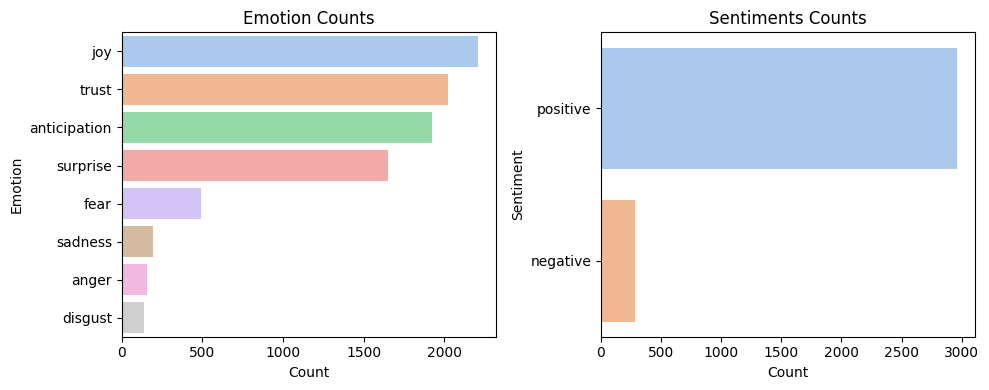

In [233]:
fig ,ax=plt.subplots(figsize=(10,4),ncols=2)
sns.barplot(emotions_df.sort_values('Count',ascending=False),x='Count',y='Emotion',ax=ax[0],palette='pastel')
ax[0].set_title('Emotion Counts')

sns.barplot(sentiments_df.sort_values('Count',ascending=False),x='Count',y='Sentiment',ax=ax[1],palette='pastel')
ax[1].set_title('Sentiments Counts')

plt.tight_layout()
plt.show()

<b>Pie chart

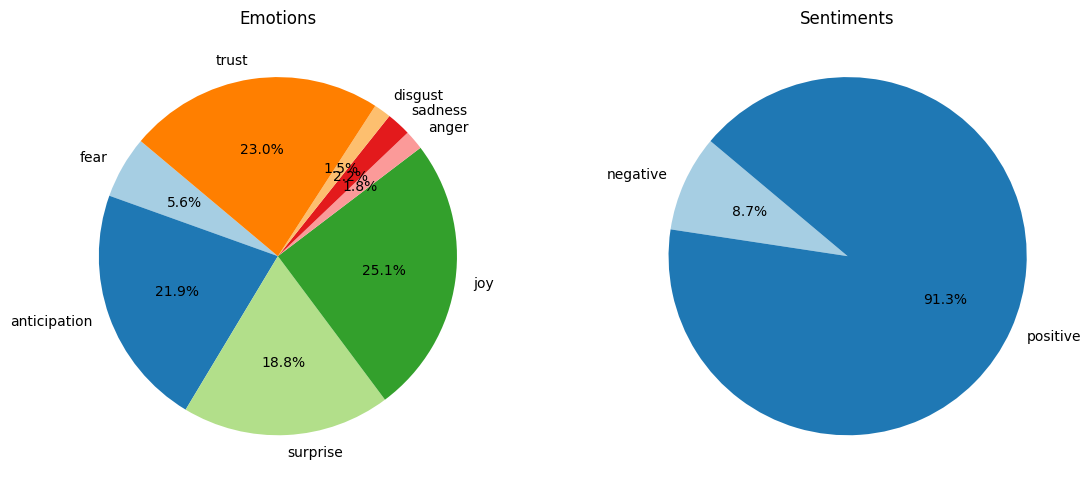

In [248]:
fig ,ax=plt.subplots(figsize=(12,5),ncols=2)

# Create a pie chart
ax[0].pie(emotions_df.Count,labels=emotions_df.Emotion, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax[0].set_title('Emotions')

ax[1].pie(sentiments_df.Count, labels=sentiments_df.Sentiment, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax[1].set_title('Sentiments')

plt.tight_layout()
plt.show()


<b>WordCloud of Emotions

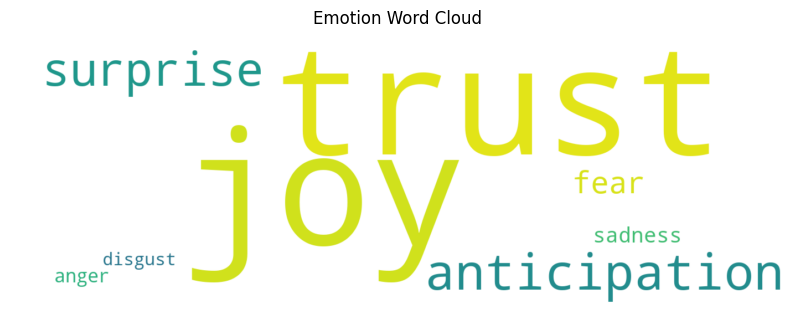

In [234]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text  = {row['Emotion']: row['Count'] for _, row in emotions_df.iterrows()}


wordcloud = WordCloud(width=1400, height=500, background_color='white').generate_from_frequencies(text)
# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Emotion Word Cloud')
plt.show()


<b>WordCloud of Emotions+Sentiments

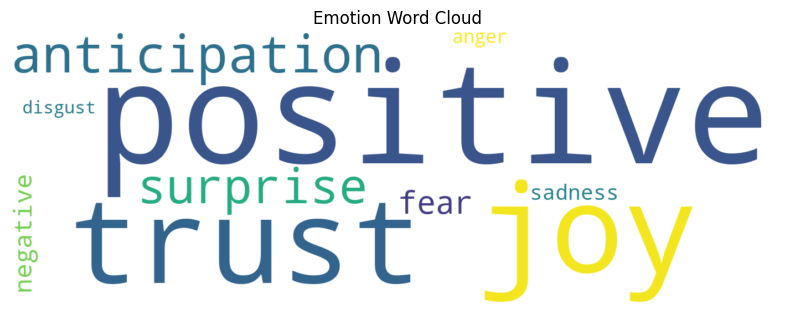

In [237]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text  = {row['Emotion']: row['Count'] for _, row in df.iterrows()}


wordcloud = WordCloud(width=1400, height=500, background_color='white').generate_from_frequencies(text)
# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Emotion Word Cloud')
plt.show()

### Conclusion

<b>From the emotions obtained using NRCLexicon and from the above plots its clear that the reviews has dominating positive sentiments and emotions  
    <b>25% customers express 23% trust followed 22% anticipation and around 19% surprice which is quite impressive  
        <b>91% positivity is found from the reviews  
            <b>Overall , the purchase is worthy and recommendable

SyntaxError: incomplete input (4070264491.py, line 6)